# Ridge & Lasso Regression Regression

**Simple Linear Regression Model**

In [4]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [5]:
# models to predict the sales given the spend on marketing
data = {'Marketing Spend(Million $)' : [23, 26, 30, 34, 43, 48],
        'Sales(Million $)' : [651, 762, 856, 1063, 1190, 1298]}
data = pd.DataFrame(data)
data

,Marketing Spend(Million $),Sales(Million $)
0,23,651
1,26,762
2,30,856
3,34,1063
4,43,1190
5,48,1298


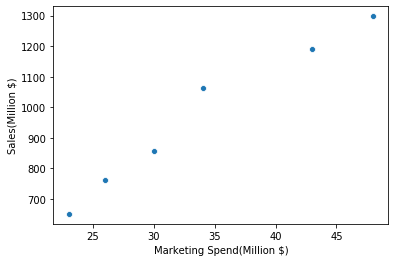

In [6]:
# scatterplot to vizualizedata
sns.scatterplot(data = data, x = 'Marketing Spend(Million $)', y = 'Sales(Million $)')

In [7]:
#scaling data between 0 & 1
scaler = MinMaxScaler()
data[['Marketing Spend(Million $)','Sales(Million $)']] = \
scaler.fit_transform(data[['Marketing Spend(Million $)', 'Sales(Million $)']])

In [8]:
data

,Marketing Spend(Million $),Sales(Million $)
0,0.00,0.000000
1,0.12,0.171561
2,0.28,0.316847
3,0.44,0.636785
4,0.80,0.833076
5,1.00,1.000000


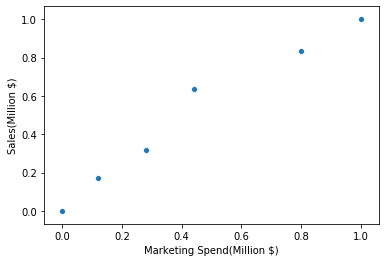

In [9]:
#plotting after scaling
sns.scatterplot(data = data, x = 'Marketing Spend(Million $)', y = 'Sales(Million $)')

**Building Linear Regression Model**

In [10]:
# reading data
X= data['Marketing Spend(Million $)'].values.reshape(-1,1)
y= data['Sales(Million $)']

In [11]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#prediction on the basis of model
y_pred = reg.predict(X)
y_pred

array([0.05907859, 0.17743302, 0.33523892, 0.49304482, 0.8481081 ,
       1.04536548])

In [13]:
r2_score(y, y_pred)

0.9652190930694494

In [14]:
# Residual Sum of squares = Mean_Squared_Errors * Total number of data points
rss = np.sum(np.square(y-y_pred))
print(rss)
mse=mean_squared_error(y,y_pred)
print(mse)
#Root Mean Squared Error
rmse = mse**0.5
print(rmse)

0.026808307381756883
0.004468051230292814
0.06684348308019873


<function matplotlib.pyplot.show(*args, **kw)>

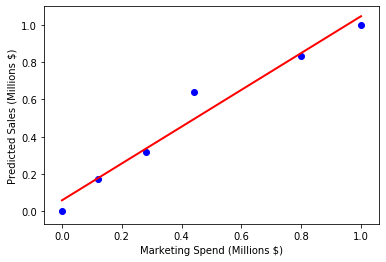

In [15]:
#plot for predicted sames vs Marketing spend
plt.scatter(X, y, color = 'blue') # original data shown as blue points
plt.plot(X, y_pred, color = 'red', linewidth = 2)#fitted th emodel in red
plt.xlabel('Marketing Spend (Millions $)')
plt.ylabel('Predicted Sales (Millions $)')
plt.show

Let's say that we want a better fit and hence we use higher degree polynomials as predictor

In [16]:
#help (polynomialFeatures)
X =data['Marketing Spend(Million $)'].values.reshape(-1,1)
print(X)

[[0.  ]
 [0.12]
 [0.28]
 [0.44]
 [0.8 ]
 [1.  ]]


In [17]:
poly = PolynomialFeatures(3)  #want to generate features with degree less than or equal to
                              #the specified degree
Y = poly.fit_transform(X)#Transform the variable X to 1, X, X^2, X^3
print(Y)

[[1.       0.       0.       0.      ]
 [1.       0.12     0.0144   0.001728]
 [1.       0.28     0.0784   0.021952]
 [1.       0.44     0.1936   0.085184]
 [1.       0.8      0.64     0.512   ]
 [1.       1.       1.       1.      ]]


In [18]:
#Building the polynomial regression model with degree 5
degree = 5 # got the number through trial and this is the lowest value in which the data fits perfectly
polyreg5= PolynomialFeatures(degree)
X_poly5 = polyreg5.fit_transform(X)# Transform the variable X to 1, X, X^2, X^3, X^4, X^5
linreg5 = LinearRegression()
linreg5.fit(X_poly5, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

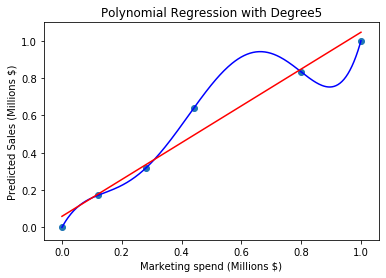

In [22]:
#plotting the polynomial regression(degree 5) and simple linear regression
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)# between 0 $ 1 get 300 equally spaced values
#print X-seq
plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,linreg5.predict(polyreg5.fit_transform(X_seq)), color="blue")#model fit with polynomial
plt.plot(X_seq,reg.predict(X_seq),color="red")# model fit with linear regression
plt.title("Polynomial Regression with Degree"+str(degree))
plt.xlabel("Marketing spend (Millions $)")
plt.ylabel("Predicted Sales (Millions $)")
plt.show()

In [26]:
y_pred5 = linreg5.predict(polyreg5.fit_transform(X))# store predictions from the polynomial regressions
print(r2_score(y,y_pred5))

1.0


In [27]:
#metrics to perform model performance
rss=np.sum(np.square(y-y_pred5))
mse=mean_squared_error(y, y_pred5)
rmse=mse**0.5
print(rss, mse, rmse)

1.6288128800067282e-28 2.714688133344547e-29 5.2102669157582964e-15


**Ridge Regression**

ValueError: Expected 2D array, got 1D array instead:
array=[0.         0.00334448 0.00668896 0.01003344 0.01337793 0.01672241
 0.02006689 0.02341137 0.02675585 0.03010033 0.03344482 0.0367893
 0.04013378 0.04347826 0.04682274 0.05016722 0.05351171 0.05685619
 0.06020067 0.06354515 0.06688963 0.07023411 0.0735786  0.07692308
 0.08026756 0.08361204 0.08695652 0.090301   0.09364548 0.09698997
 0.10033445 0.10367893 0.10702341 0.11036789 0.11371237 0.11705686
 0.12040134 0.12374582 0.1270903  0.13043478 0.13377926 0.13712375
 0.14046823 0.14381271 0.14715719 0.15050167 0.15384615 0.15719064
 0.16053512 0.1638796  0.16722408 0.17056856 0.17391304 0.17725753
 0.18060201 0.18394649 0.18729097 0.19063545 0.19397993 0.19732441
 0.2006689  0.20401338 0.20735786 0.21070234 0.21404682 0.2173913
 0.22073579 0.22408027 0.22742475 0.23076923 0.23411371 0.23745819
 0.24080268 0.24414716 0.24749164 0.25083612 0.2541806  0.25752508
 0.26086957 0.26421405 0.26755853 0.27090301 0.27424749 0.27759197
 0.28093645 0.28428094 0.28762542 0.2909699  0.29431438 0.29765886
 0.30100334 0.30434783 0.30769231 0.31103679 0.31438127 0.31772575
 0.32107023 0.32441472 0.3277592  0.33110368 0.33444816 0.33779264
 0.34113712 0.34448161 0.34782609 0.35117057 0.35451505 0.35785953
 0.36120401 0.36454849 0.36789298 0.37123746 0.37458194 0.37792642
 0.3812709  0.38461538 0.38795987 0.39130435 0.39464883 0.39799331
 0.40133779 0.40468227 0.40802676 0.41137124 0.41471572 0.4180602
 0.42140468 0.42474916 0.42809365 0.43143813 0.43478261 0.43812709
 0.44147157 0.44481605 0.44816054 0.45150502 0.4548495  0.45819398
 0.46153846 0.46488294 0.46822742 0.47157191 0.47491639 0.47826087
 0.48160535 0.48494983 0.48829431 0.4916388  0.49498328 0.49832776
 0.50167224 0.50501672 0.5083612  0.51170569 0.51505017 0.51839465
 0.52173913 0.52508361 0.52842809 0.53177258 0.53511706 0.53846154
 0.54180602 0.5451505  0.54849498 0.55183946 0.55518395 0.55852843
 0.56187291 0.56521739 0.56856187 0.57190635 0.57525084 0.57859532
 0.5819398  0.58528428 0.58862876 0.59197324 0.59531773 0.59866221
 0.60200669 0.60535117 0.60869565 0.61204013 0.61538462 0.6187291
 0.62207358 0.62541806 0.62876254 0.63210702 0.63545151 0.63879599
 0.64214047 0.64548495 0.64882943 0.65217391 0.65551839 0.65886288
 0.66220736 0.66555184 0.66889632 0.6722408  0.67558528 0.67892977
 0.68227425 0.68561873 0.68896321 0.69230769 0.69565217 0.69899666
 0.70234114 0.70568562 0.7090301  0.71237458 0.71571906 0.71906355
 0.72240803 0.72575251 0.72909699 0.73244147 0.73578595 0.73913043
 0.74247492 0.7458194  0.74916388 0.75250836 0.75585284 0.75919732
 0.76254181 0.76588629 0.76923077 0.77257525 0.77591973 0.77926421
 0.7826087  0.78595318 0.78929766 0.79264214 0.79598662 0.7993311
 0.80267559 0.80602007 0.80936455 0.81270903 0.81605351 0.81939799
 0.82274247 0.82608696 0.82943144 0.83277592 0.8361204  0.83946488
 0.84280936 0.84615385 0.84949833 0.85284281 0.85618729 0.85953177
 0.86287625 0.86622074 0.86956522 0.8729097  0.87625418 0.87959866
 0.88294314 0.88628763 0.88963211 0.89297659 0.89632107 0.89966555
 0.90301003 0.90635452 0.909699   0.91304348 0.91638796 0.91973244
 0.92307692 0.9264214  0.92976589 0.93311037 0.93645485 0.93979933
 0.94314381 0.94648829 0.94983278 0.95317726 0.95652174 0.95986622
 0.9632107  0.96655518 0.96989967 0.97324415 0.97658863 0.97993311
 0.98327759 0.98662207 0.98996656 0.99331104 0.99665552 1.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

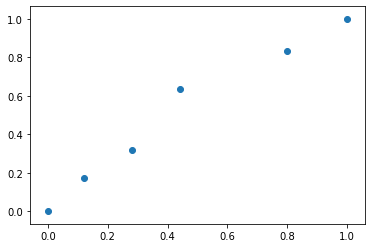

In [29]:
#Applying Ridge Rigression by varying the Hyperparameter Lambda\

X_seq = np.linspace(X.min(),X.max(),300) # values tobe considered for predictor variables
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000] # Higher the value of labda, higher the regularization

for i in lambdas: #for each lambda we get a diffrent corfficients
    degree = 5 #Degree of polynomial regression
    # creating degree 5 features
    ridgecoef = PolynomialFeatures(degree)
    #transforming input features to polynomial features (1, x1, x2, x3, x4, x5)
    X_poly = ridgecoef.fit_transform(X)
    ridgereg = Ridge(alpha = i) # initializing the Ridge Regression model with specific lambdas
    ridgereg.fit(X_poly, y)#fit the model on the polynomial features
    
    #plotting the ridge regression model for each lambda
    plt.figure()
    plt.scatter(X,y)
    plt.plot(X_seq, ridgereg.predict(ridgecoef.fit_transform(X_seq)),color="blue")#polynomial regression
    plt.plot(X_seq,reg.predict(X_seq),color="red")#linear regression
    plt.title("Polynomial Regression with degree"+str(degree) + "and lambda = "+str(i))
    plt.show()
    
    #Computingthe r2 score
    